<a href="https://colab.research.google.com/github/maoya23/Generative-Model-bigginer/blob/main/lesson4_MixedGaussian_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 生成モデルを理解する lesson4

[参考資料：混合ガウスモデル](https://datachemeng.com/gaussianmixturemodel/)

### Chapter1 : 混合ガウスモデルとは


混合ガウスモデル（Gaussian Mixture Model, GMM）は、複数のガウス分布の線形結合で表される確率分布である。K個のガウス分布の混合で表される場合、確率密度関数p(x)は以下のように表される。
</br>
</br>
$$
p(x) = \sum_{k=1}^{K} \pi_k N(x|\mu_k, \Sigma_k)
$$
また、ガウス分布の式は以下になる。
$$
N(x|\mu_k, \Sigma_k) = \frac{1}{(2\pi)^{D/2}|\Sigma_k|^{1/2}} \exp\left(-\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)\right)
$$
</br>

- $N(x|\mu_k, \Sigma_k)$: 平均μ_k、共分散行列Σ_kのk番目のガウス分布
- x: D次元データ点
- $μ_k$: k番目のガウス分布の平均ベクトル
- $Σ_k$: k番目のガウス分布の共分散行列
- D: データの次元数

- $|Σ_k|$: 共分散行列Σ_kの行列式

In [ ]:
#ライブラリのインストール
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

### Chapter2 : 混合ガウスモデルによるクラスタリング

混合ガウスモデルは、データから何個のガウス分布ができるかを推定することができる。</br>

 ⇨つまりは、クラスタリングとして使用できる。


- データセット：アヤメのデータセット

In [ ]:
#データのロード
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['label'] = iris.target

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Text(0, 0.5, 'sepal width (cm)')

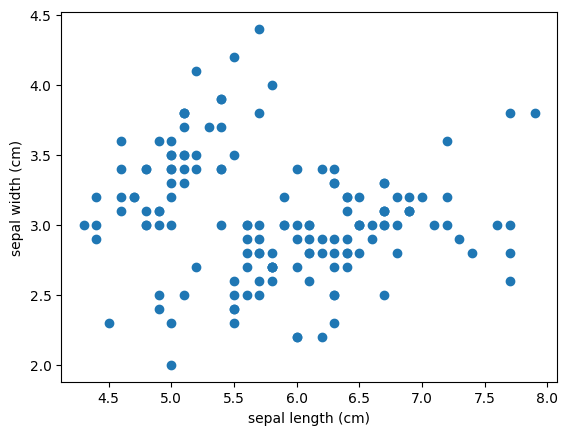

In [ ]:
# 結果を図示してみる。
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

#### PCAによる次元削減

DataFrame形式にあるデータの次元は4次元なのでPCAを使って2次元に変更して可視化しやすくする。
PCAに関しては別途参照

[次元削減アルゴリズムで有名な主成分分析(PCA)をわかりやすく解説【Pythonコード付】](https://zero2one.jp/learningblog/dimension-reduction-with-python/)

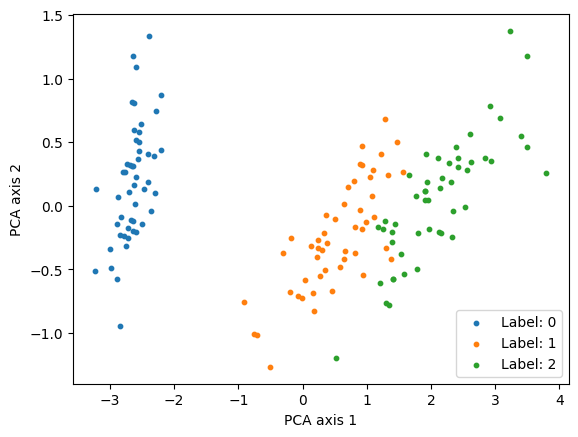

In [ ]:
pca = PCA(n_components=2)
data = df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]].values
trans_pca = pca.fit_transform(data)

fig, ax = plt.subplots()

cmap = plt.get_cmap("tab10")
color = [cmap(label) for label in df.label]

ax.set_xlabel("PCA axis 1")
ax.set_ylabel("PCA axis 2")

for i in range(3):
    ax.scatter(trans_pca[df[df.label == i].index, 0], trans_pca[df[df.label == i].index, 1], color=cmap(i), s=10, marker="o", label="Label: {}".format(i))
ax.legend()

In [ ]:
from matplotlib.colors import LogNorm
from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(trans_pca)

labels = gmm.predict(trans_pca)

Text(0.5, 1.0, 'Clustering by GMM')

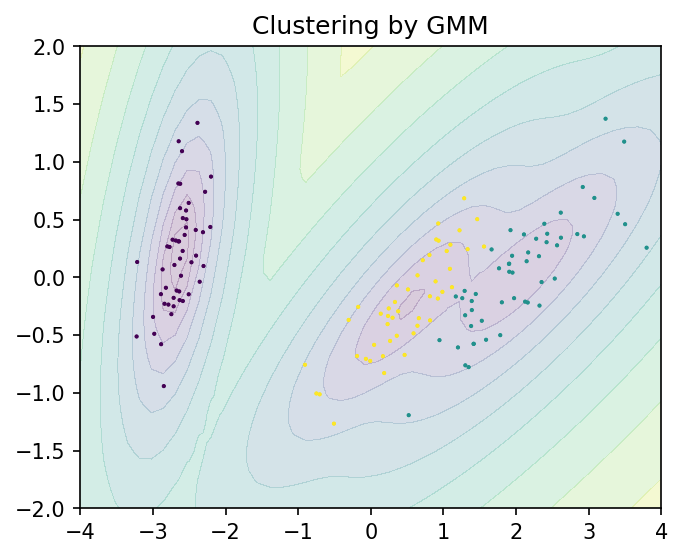

In [ ]:
x = np.linspace(-4, 4)
y = np.linspace(-2, 2)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z =  - gmm.score_samples(XX)
Z = Z.reshape(X.shape)

fig,ax=plt.subplots(dpi=150,figsize=(5,4))

ax.scatter(trans_pca[:, 0], trans_pca[:, 1], s=0.5,c=labels)
cont = ax.contourf(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=100.0), levels=np.logspace(-1, 3, 20), alpha=0.2, linestyles='dashed')
ax.scatter(trans_pca[:, 0], trans_pca[:, 1], s=1, c=labels)

ax.set_title("Clustering by GMM")